In [3]:
import os
os.chdir('/app/NBT-Classifier/')
import random
import numpy as np
import pandas as pd
from PIL import Image
import staintools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [4]:
features_df = pd.read_csv("../examples/NBTClassifier_512px_externaltesting.csv")

/tmp/ipykernel_2137993/360811105.py:1: DtypeWarning: Columns (522) have mixed types. Specify dtype option on import or set low_memory=False.
  features_df = pd.read_csv("../examples/NBTClassifier_512px_externaltesting.csv")


In [4]:
tsne_df = features_df.copy()
embedding_columns = [col for col in tsne_df.columns if col.startswith('feature_')]
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(tsne_df.loc[:, embedding_columns])

tsne_df["tsne1"] = -projections[:,0]
tsne_df["tsne2"] = -projections[:,1]
tsne_df.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'true_label', 'TC_epi', 'TC_str', 'TC_adi', 'TC_pred', 'cohort',
       'tsne1', 'tsne2', 'confidence', 'misclassified'],
      dtype='object', length=523)

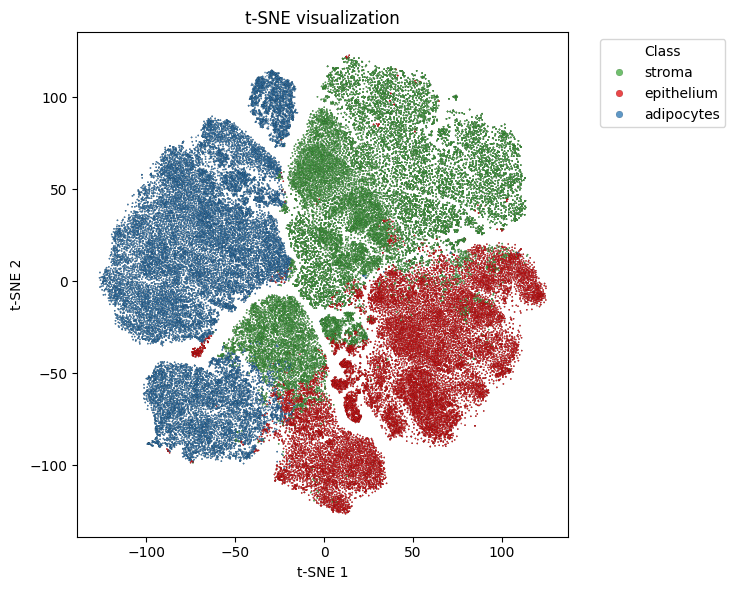

In [5]:
set1_palette = sns.color_palette('Set1', n_colors=3)
custom_palette = {'epithelium': set1_palette[0],  # Red
                  'stroma': set1_palette[2],      # Green
                  'adipocytes': set1_palette[1]}     # Blue

plt.figure(figsize=(7.5, 6))
sns.scatterplot(data=tsne_df, x='tsne1', y='tsne2', hue='TC_pred', palette=custom_palette, s=1, edgecolor='k', alpha=0.8)

plt.title("t-SNE visualization")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=5)
plt.tight_layout()
plt.show()

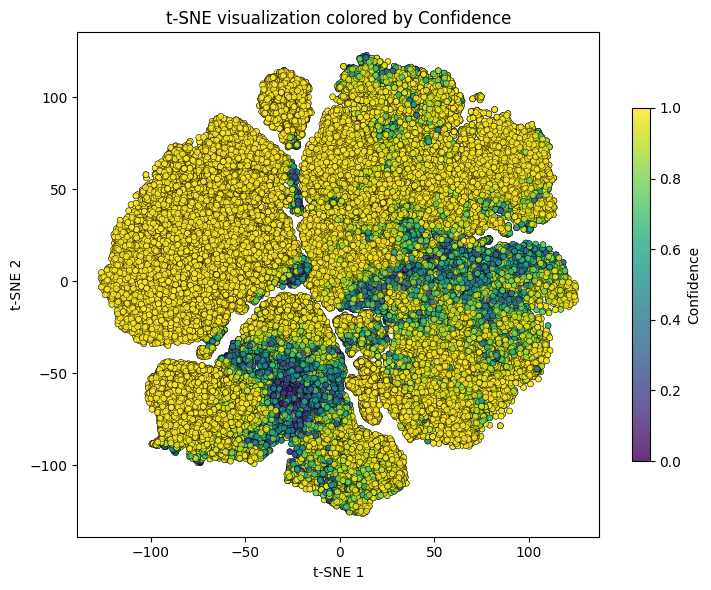

In [6]:
viridis_cmap = sns.color_palette("viridis", as_cmap=True)

plt.figure(figsize=(7.5, 6))
scatter = sns.scatterplot(data=tsne_df, x='tsne1', y='tsne2', hue='confidence', palette=viridis_cmap, 
                          size=0.1, edgecolor='k', alpha=0.8, legend=None)

plt.colorbar(scatter.collections[0], label="Confidence", shrink=0.7)
plt.title("t-SNE visualization colored by Confidence")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()

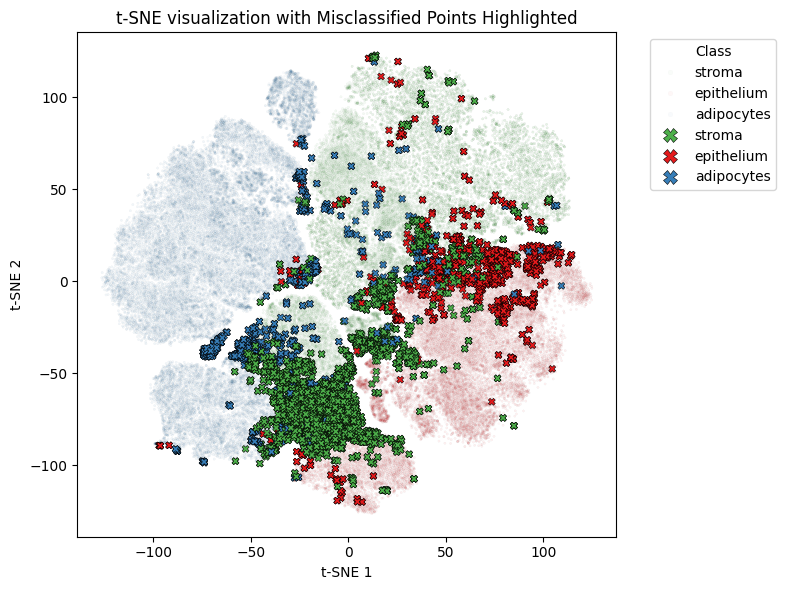

In [7]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=tsne_df[~tsne_df['misclassified']], x='tsne1', y='tsne2', hue='true_label', 
                palette=custom_palette, s=3, edgecolor='k', alpha=0.03, marker='o')

sns.scatterplot(data=tsne_df[tsne_df['misclassified']], x='tsne1', y='tsne2', hue='true_label', 
                palette=custom_palette, s=25, edgecolor='k', alpha=1.0, marker='X')

plt.title("t-SNE visualization with Misclassified Points Highlighted")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=2)
plt.tight_layout()
plt.show()

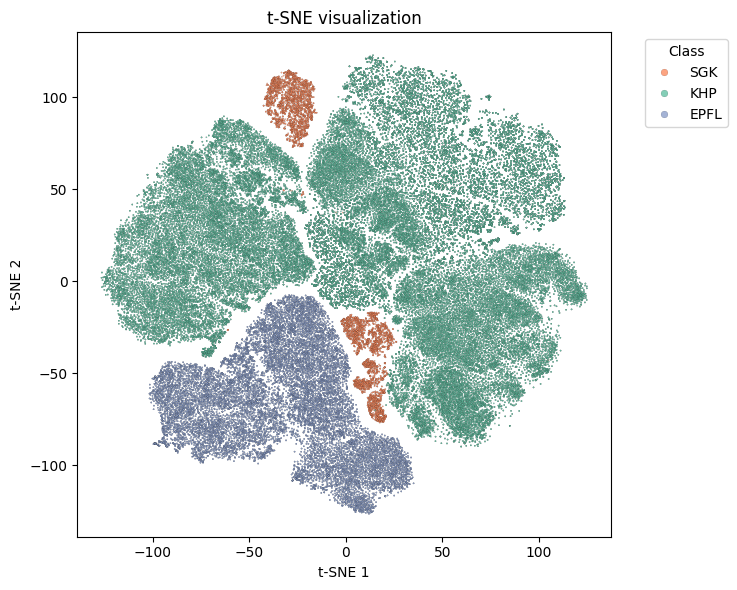

In [8]:
set1_palette = sns.color_palette('Set2', n_colors=3)
custom_palette = {'KHP': set1_palette[0],  
                  'SGK': set1_palette[1],      
                  'EPFL': set1_palette[2]}    

plt.figure(figsize=(7.5, 6))
sns.scatterplot(data=tsne_df, x='tsne1', y='tsne2', hue='cohort', palette=custom_palette, s=1, edgecolor='k', alpha=0.8)
plt.title("t-SNE visualization")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=5)
plt.tight_layout()
plt.show()

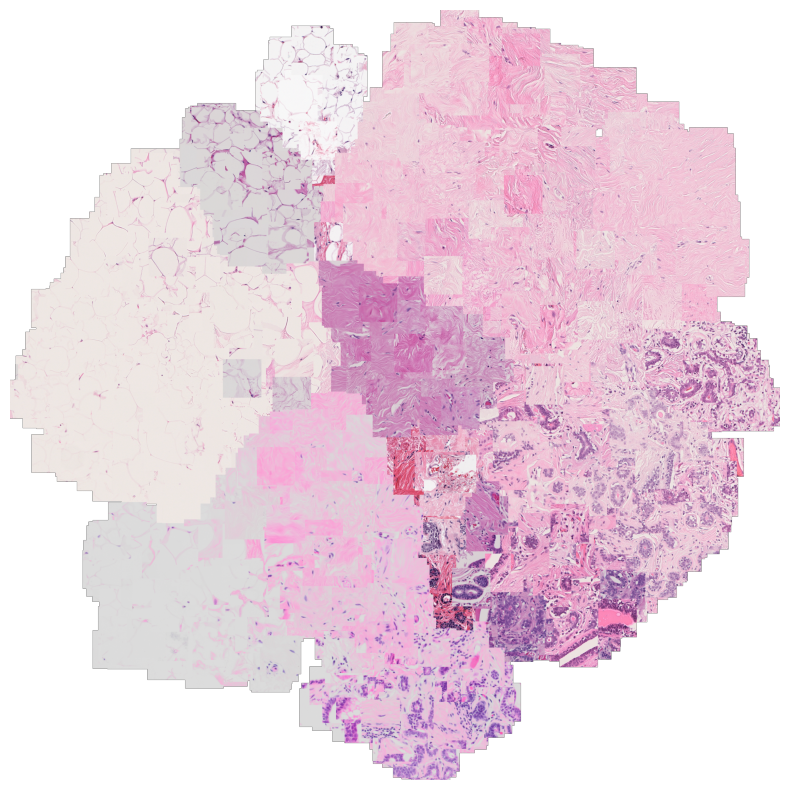

In [11]:
# max_dim = 100
# width, height = (2000, 2000)
# random_state = 42
# random.seed(random_state)

# # Sample 500 im_paths per cluster
# random_df = tsne_df.groupby('true_label').apply(lambda group: group.sample(n=500, replace=True, random_state=random_state))

# # Reset the index to avoid multi-index
# random_df = random_df.reset_index(drop=True)

# # Normalize t-SNE projections to [0, 1] for consistent positioning
# tx, ty = random_df["tsne1"], random_df["tsne2"]
# tx = (tx - np.min(tx)) / (np.max(tx) - np.min(tx))
# ty = (ty - np.min(ty)) / (np.max(ty) - np.min(ty))

# # Initialize the canvas
# full_image = Image.new('RGBA', (width, height))

# for im_path, tsne_x, tsne_y, cluster_id in zip(random_df['file_path'], tx, ty, random_df['true_label']):
#     im = Image.open(im_path)
    
#     # Resize image to fit within the max dimension
#     rs = max(1, im.width / max_dim, im.height / max_dim)
#     tile = im.resize((int(im.width / rs), int(im.height / rs)))

#     # Normalize t-SNE coordinates to canvas dimensions
#     x_pos = int(tsne_x * (width - tile.width))  # Scale the x coordinate to canvas size
#     y_pos = int(tsne_y * (height - tile.height))  # Scale the y coordinate to canvas size

#     # Paste the resized tile on the canvas
#     full_image.paste(tile, (x_pos, y_pos))


full_image = Image.open('../examples/TC512_tsne_HEOverlay.png')
flipped_image = full_image.transpose(Image.FLIP_TOP_BOTTOM)

plt.figure(figsize=(12, 10))
plt.imshow(flipped_image)
plt.axis('off')  # Optional: removes axis for a cleaner look
plt.show()